# Dimensional reduction
- Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법
- 데이터를 더 잘 설명할 수 있는 잠재적인 요소 추출
- 자료의 크기가 작을 경우 용이하고, 데이터가 크면 높은 차원이 유리할 수 있음

In [1]:
import warnings
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package load

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

from sklearn.datasets import make_classification
from sklearn.datasets import make_swiss_roll

## Decomposition Methods

### (1) PCA
- Principal Component Analysis
- 수치형 자료의 공변을 알아내어, Feature들이 통계적으로 상관없도록 축 회전
- 자료의 변동이 최대한 보존되는 저차원 자료 생성
- SVD 알고리즘 기반으로 구현됨
- PCA(SVD)는 반드시 StandardScaler로 스케일링 해야 함
- 각 특징은 정규분포를 가정함
- 그래프 축 해석이 어려우며, 비선형 구조는 반영하지 못함

#### PCA Pipeline

In [5]:
### iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

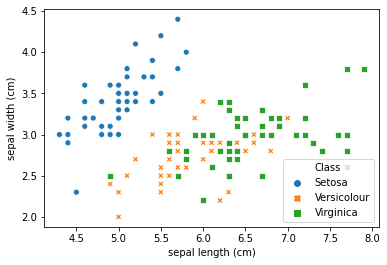

In [6]:
sns.scatterplot(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], hue=iris.Class, style=iris.Class)
plt.show()

In [7]:
x = iris.drop(columns = 'Class') # 수치형 데이터만 추출
x_scaled = StandardScaler().fit_transform(x) # 수치형 변수 정규화

pd.DataFrame(x_scaled).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [8]:
from sklearn.decomposition import PCA

In [9]:
# 주성분 추출
pca = PCA(n_components=len(iris.columns.difference(['Class'])))
pca_fit = pca.fit(x_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)
print("2개 주성분 분산 설명력 합:", np.sum(pca.explained_variance_ratio_[:2]))

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]
2개 주성분 분산 설명력 합: 0.9581320720000164


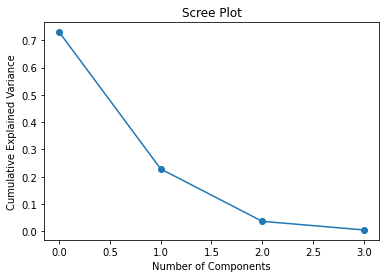

In [10]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [11]:
pca = PCA(n_components=2)                    
principal_components = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2']) 
principal_iris.head()

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [12]:
### Eigenvectors
e_vector = pd.DataFrame(pca.components_, index=[f'comp{i}' for i in range(1, 2+1)], columns=x.columns)
e_vector

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
comp1,0.361387,-0.084523,0.856671,0.358289
comp2,0.656589,0.730161,-0.173373,-0.075481


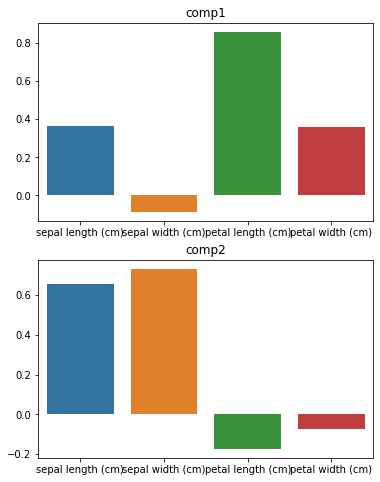

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
for i, ax in enumerate(axes):
    ax.set_title(e_vector.index[i])
    sns.barplot(x=e_vector.iloc[i].index, y=e_vector.iloc[i].values, ax=ax)

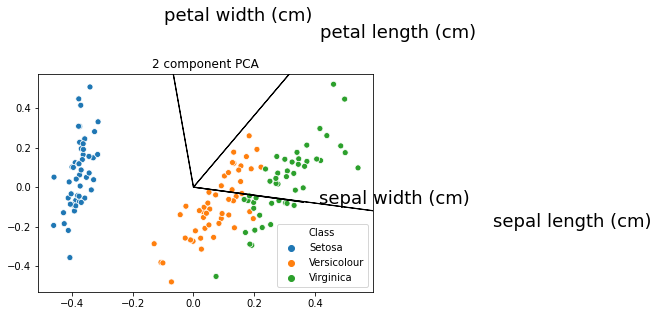

In [14]:
### Biplot
PC1 = pca.fit_transform(x)[:,0]
PC2 = pca.fit_transform(x)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = iris.columns.difference(['Class'])
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2, hue=iris.Class)
plt.title('2 component PCA')
plt.show()

In [15]:
### USArrest data
usarrests = pd.read_csv('./dataset/USArrests.csv', index_col='Unnamed: 0')
usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [16]:
usarrests_scaled = StandardScaler().fit_transform(usarrests)
pd.DataFrame(usarrests_scaled).head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [17]:
pca = PCA(n_components=0.85) # 설명량의 합을 기준으로 pca 진행 가능
pca_fit = pca.fit(usarrests_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)
print("분산 설명력 합", np.sum(pca.explained_variance_ratio_)) # 설명력이 주어진 기준을 넘는 주성분 개수가 뽑힘

고유 값 :  [11.13607107  7.0347891 ]
분산 설명력:  [0.62006039 0.24744129]
분산 설명력 합 0.8675016829223337


In [18]:
pca = PCA(n_components=len(pca.explained_variance_ratio_))
principal_components = pca.fit_transform(usarrests_scaled)
principal_usarrests = pd.DataFrame(data = principal_components, columns=[f'pc{i+1}' for i in range(len(pca.explained_variance_ratio_))])
principal_usarrests.index = usarrests.index
principal_usarrests.head()

,pc1,pc2
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


In [19]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [20]:
### Eigenvectors
e_vector = pd.DataFrame(pca.components_, index=[f'comp{i}' for i in range(1, 2+1)], columns=usarrests.columns)
e_vector

,Murder,Assault,UrbanPop,Rape
comp1,0.535899,0.583184,0.278191,0.543432
comp2,0.418181,0.187986,-0.872806,-0.167319


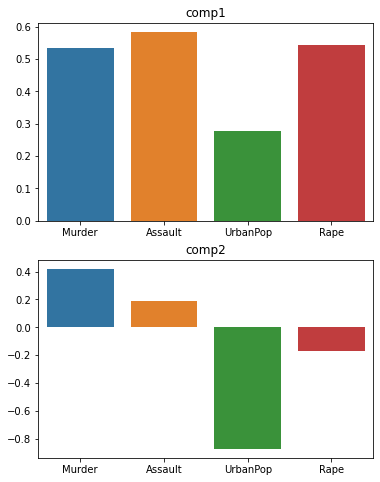

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
for i, ax in enumerate(axes):
    ax.set_title(e_vector.index[i])
    sns.barplot(x=e_vector.iloc[i].index, y=e_vector.iloc[i].values, ax=ax)

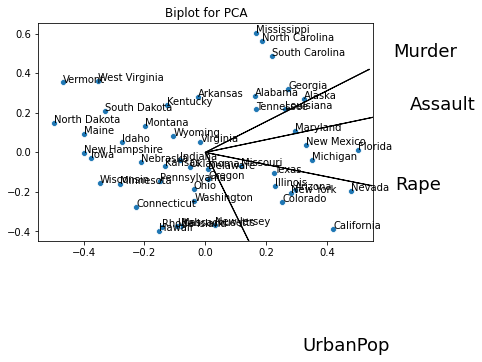

In [22]:
### Biplot
# 2개의 주성분만 그래프로 표현
PC1 = pca.fit_transform(usarrests_scaled)[:,0]
PC2 = pca.fit_transform(usarrests_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = usarrests.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for city in principal_usarrests.index:
    plt.annotate(city, (principal_usarrests.loc[city, 'pc1']*scalePC1, principal_usarrests.loc[city, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

#### PCA for large data

In [23]:
### credit card data
# !pip install xlrd
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
card = pd.read_excel('./dataset/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(card.shape)
card.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [24]:
card.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'}, inplace=True)
x = card.drop('default', axis=1)
y = card['default']

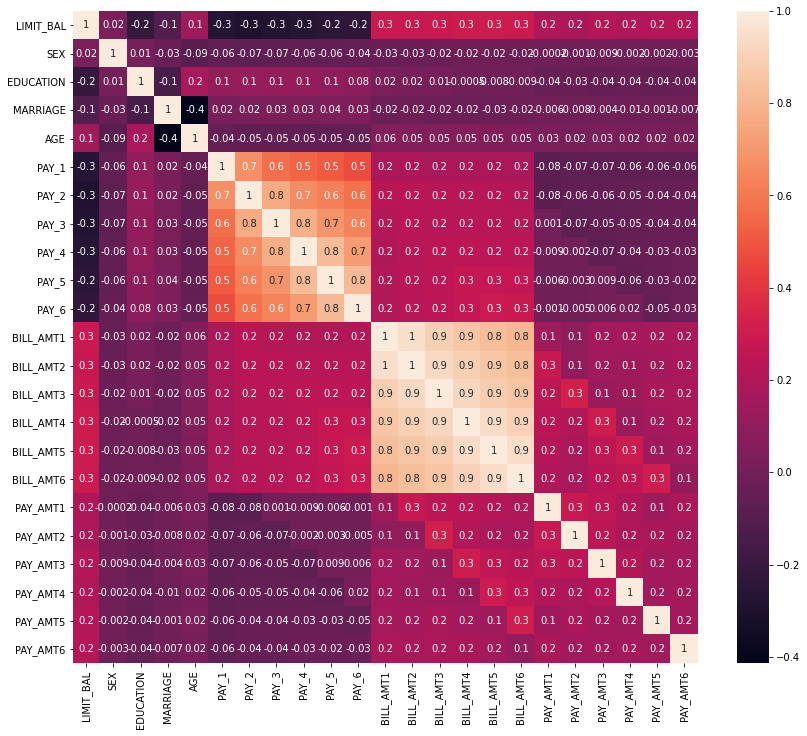

In [25]:
plt.figure(figsize=(14, 12))
sns.heatmap(x.corr(), annot=True, fmt='.1g')
plt.show()

In [26]:
# 상관성이 높은 변수만 PCA
# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 추출하고 scaling
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
scaler = StandardScaler()
bill_scaled = scaler.fit_transform(x[cols_bill])
x.loc[:, cols_bill] = bill_scaled

pca = PCA(n_components=2)
pca.fit(bill_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


#### Random PCA
- 처음 d개의 주성분 근삿값을 빠르게 찾아 줌
- 속도가 빠름

In [27]:
card_scaled = pd.DataFrame(scaler.fit_transform(card), columns=card.columns)

In [28]:
rnd_pca = PCA(n_components=len(card.columns), svd_solver="randomized", random_state=42) # svd_solver를 randomized로 지정
x_reduced = rnd_pca.fit_transform(card_scaled)

#### Incremental PCA
- 조금씩 데이터를 쌓아가면서 PCA 구현
- 메모리 사용량 조절
- 일반적인 PCA와 결과물이 완벽하게 동일하지는 않으나, 상당히 유사함

In [29]:
from sklearn.decomposition import IncrementalPCA

In [30]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=len(card.columns))
for x_batch in np.array_split(card_scaled, n_batches):
    print(".", end="")
    inc_pca.partial_fit(x_batch)

x_reduced_inc = inc_pca.transform(card_scaled)

....................................................................................................

#### Kernel PCA
- Kernal을 통해 새로운 Feature Space로 매핑 시킨 후 PCA 수행
- 비선형 특징을 고려한 주성분 추출

In [31]:
from sklearn.decomposition import KernelPCA

In [32]:
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

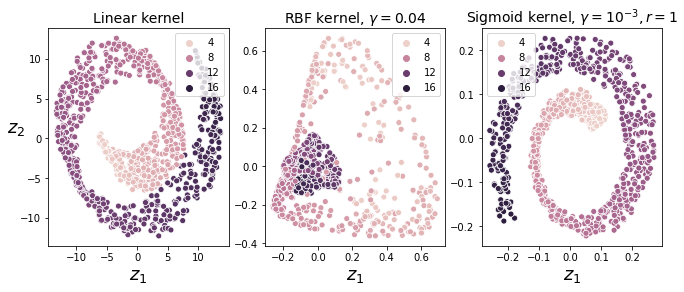

In [33]:
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"),
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    x_reduced = pca.fit_transform(x)
    if subplot == 132:
        x_reduced_rbf = x_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)

plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

In [35]:
### (참고) Hyperparameter tuning with kernels
clf = Pipeline([("kpca", KernelPCA(n_components=2)), ("log_reg", LogisticRegression(solver="lbfgs"))])

param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__kernel": ["rbf", "sigmoid"]}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x, y)
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

### (2) SVD
- Singular Value Decomposition
- 희소 행렬의 변환 가능
- 패턴 인식, 토픽 모델링, 문서 클러스터링, 상품 추천 등

#### SVD Basics

In [36]:
from numpy.linalg import svd
from scipy.sparse.linalg import svds

In [37]:
# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [38]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [39]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [40]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [41]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [42]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD

In [43]:
# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

In [44]:
from sklearn.decomposition import TruncatedSVD, PCA

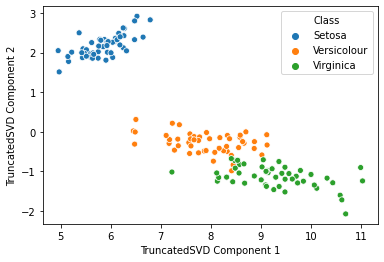

In [45]:
### TruncatedSVD from scikit-learn
# 분해한 행렬을 반환하지는 않고, 차원 축소 변환
iris_ftrs = iris.iloc[:, :4]

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

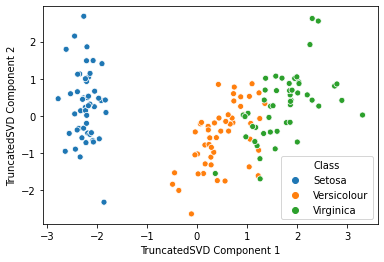

In [46]:
# StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# TruncatedSVD 변환 데이터 표현
# PCA 축소 결과와 거의 동일
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

### (3) NMF
- Non-Negative Matrix Factorization
- SVD와 유사한, 낮은 랭크 행렬 근사 방법
- 사용 분야도 SVD와 유사
- 원본 행렬이 모두 양수일 때, 두 개의 양수 행렬(W, H)로 분해
- 스케일링 하면 안됨, 하더라도 MinMaxScaler 해야 함
- 이미지와 텍스트를 표현하는 데 효울적임
- 차원 축소, 소스 분리, 주제 추출 등

In [47]:
from sklearn.decomposition import NMF

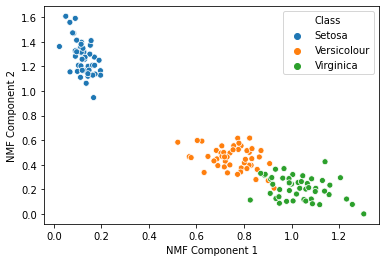

In [48]:
iris_ftrs = iris.iloc[:, :4]

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs) # W 행렬

sns.scatterplot(x=iris_nmf[:,0], y=iris_nmf[:,1], hue=iris.Class)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

In [49]:
nmf_comp = pd.DataFrame(nmf.components_, index=[f'NMF {i}' for i in range(1, 2+1)], columns=iris_ftrs.columns) # H 행렬 (Factorization Matrix)
nmf_comp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
NMF 1,5.755408,2.315867,5.268354,1.889791
NMF 2,3.384121,2.460824,0.633662,0.000000


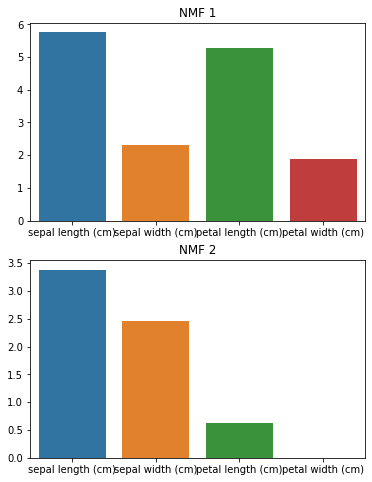

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))
for i, ax in enumerate(axes):
    ax.set_title(nmf_comp.index[i])
    sns.barplot(x=nmf_comp.iloc[i].index, y=nmf_comp.iloc[i].values, ax=ax)

### (4) ICA
- Independent Component Analysis
- Feature에 들어있는 독립 신호 추출
- 독립적인 feature를 추출하려고 하기 때문에, 새로운 각 축은 직교하지 않을 수 있음 (PCA와의 차이점)
- 중첩된 신호를 분리하는 데에 사용하며, 차원 축소 용도로는 잘 사용하지 않음
- 알고리즘: Infomax, FastICA, JADE 등

In [51]:
from sklearn.decomposition import FastICA

In [52]:
fastICA = FastICA(n_components=2, algorithm='parallel', max_iter=100, random_state=1)
x_iris_ica = fastICA.fit_transform(iris_scaled)

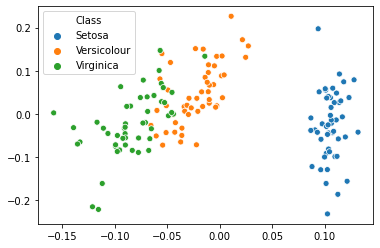

In [53]:
sns.scatterplot(x=x_iris_ica.T[0], y=x_iris_ica.T[1], hue=iris.Class)
plt.show()

### (5) LDA
- Linear Discriminant Analysis
- 집간 간 차이를 설명하는 독립변수를 찾고, 선형결합 판별식 선정
- 분류 알고리즘으로 사용되기도 함

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [55]:
### iris data
x = iris.drop(columns='Class')
iris_scaled = StandardScaler().fit_transform(x)

In [56]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.Class)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


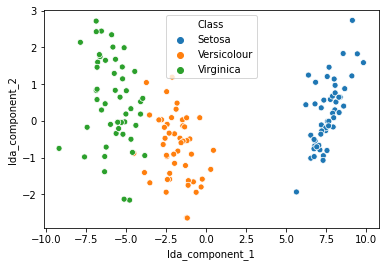

In [57]:
lda_columns = ['lda_component_1', 'lda_component_2']
iris_lda = pd.DataFrame(iris_lda, columns=lda_columns)
sns.scatterplot(x=iris_lda['lda_component_1'], y=iris_lda['lda_component_2'], hue=iris.Class)
plt.show()

### (6) FA
- (Exploratory) Factor Analysis (탐색적 요인분석)
- 유사한 변수를 묶어 축약함으로써 다중공선성을 줄이는 것이 목적
- 공동 요인(근본적인 변수)을 이용하여 변수의 상관 구조 분석
- 잠재 변수에 연결된 분산(Joint Variation)을 찾고, 오차를 추가한 인자들의 선형 결합으로 변수 표현
- Clustering과 유사하나, 분석가의 사전 지식이 어느 정도 필요함
- 변수 축소, 불필요 변수 제거, 변수 특성 파악, 요인 점수를 이용한 변수 생성 등
- 사회과학 변수의 타당성과 관련 있음
- Factor loading
    - 변수와 요인의 상관관계를 나타내는 값
    - 표준화된 값일 경우 상관계수, 그렇지 않으면 독립변수가 요인이고 종속변수가 측정변수인 회귀계수
    - 0.3 이상인 경우 유의미한 관계가 있다고 봄
- Communality
    - 각 변수에 대하여, 추출된 요인들이 설명하는 비율
    - 0.5 이상인 경우 유의미한 관계가 있다고 봄 (0.5 이하이면 요인분석에서 제외하는 것이 좋음)
- Eigenvalue
    - 측정된 변수들의 변량 중 요인에 의해 설명되는 분산의 양으로, 특정 요인이 측정변수를 몇 개 설명하는지를 의미함
    - 요인 별 요인적재량의 합
- Factor score
    - 각 데이터가 요인을 반영하고 있는 정도
- Rotation
    - 요인의 축을 이동시켜 요인 적재량을 더 극명하게 보여줌
    - Orthogonal (직각회전)
        - 요인들 간의 상호 독립성을 유지하도록 회전
        - 추가 분석 시 독립성이 보장됨
        - Varimax (요인 내 요인적재량 벡터의 분산 최대화), Quartimax(하나의 변수 내에서 요인적재량 분산 최대화), Equimax (절충형)
    - Oblique (사각회전)
        - 높은 적재량은 더 높게, 낮은 적재량은 더 낮게 회전
        - 독립성이 보장되지 않음
        - Oblimin (요인 간 적재량의 공분산 최소화), Oblimax (요인 내에서 변수 간 적재량 최대화), Promax (Varimax 이후 요인 간 상관관계를 고려한 회전)

- PCA는 최대 분산 양을 설명하는 반면 요인 분석은 데이터의 공분산을 설명한다.
- PCA는 서로 완전히 직교하지만 요인 분석에서는 요인이 직교할 필요가 없다.
- PCA는 관측된 변수의 선형 조합인 반면 요인 분석에서 관측된 변수는 관측되지 않은 변수 또는 요인의 선형 조합이다.
- PCA 구성 요소는 해석할 수 없는 반면 요인 분석에서 기본 요인은 레이블링 및 해석 가능하다.
- PCA는 일종의 차원 축소 방법인 반면 요인 분석은 잠재 변수 방법이다.
- PCA는 요인 분석의 한 유형이다. FA는 모델링 기술인 반면 PCA는 관찰 기술이다.

In [58]:
bfi = pd.read_csv("./dataset/bfi.csv", index_col="Unnamed: 0")
bfi.drop(['gender', 'education', 'age'], axis=1, inplace=True)
bfi.dropna(inplace=True)
bfi.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [59]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [60]:
### 데이터 세트의 “인자 가능성”을 평가
# 요인 분석 가능성은 “데이터 세트에서 요인을 찾을 수 있는가?”를 의미함
# 바틀렛 테스트: 관측된 변수가 단위 행렬과 상호 관련되는지 여부를 확인. 귀무가설을 기각해야 요인분석 진행 가능
# -> H0: 모집단의 상관행렬은 단위행렬과 동일하다 / H1:  모집단의 상관행렬은 단위행렬과 동일하지 않다
chi_square_value, p_value = calculate_bartlett_sphericity(bfi)
chi_square_value, p_value # 유의함.

(18170.966350869254, 0.0)

In [61]:
# KMO(Kaiser-Meyer-Olkin) 테스트
# -> 요인 분석에 대한 데이터의 적합성 측정. 모든 관측 변수 간의 분산 비율을 추정하며, KMO 값의 범위는 0에서 1 사이
# -> 0.6 미만의 KMO 값은 부적합한 것으로 간주함
kmo_all, kmo_model = calculate_kmo(bfi)
kmo_model

0.848539722194922

In [62]:
from factor_analyzer import FactorAnalyzer

In [63]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(bfi, 25)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

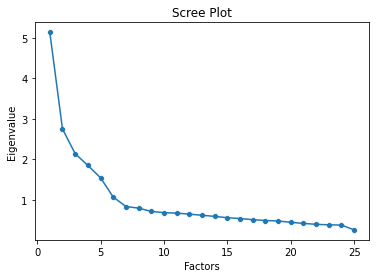

In [64]:
# Create scree plot
sns.scatterplot(x=range(1, bfi.shape[1]+1), y=ev)
sns.lineplot(x=range(1, bfi.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [65]:
# Create factor analysis object and perform factor analysis
# method: 요인 추출 방식 지정. principal (Principal Component), ml (Maximum Liklihood)
# rotation: 회전 방법 지정
fa = FactorAnalyzer(n_factors=5, method='principal', rotation="varimax")
fa.fit(bfi)

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

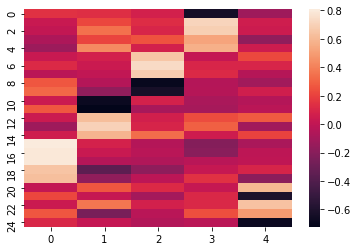

In [66]:
# 요인 적재량
sns.heatmap(pd.DataFrame(fa.loadings_))
plt.show()

In [67]:
# 요인 table
factors = pd.DataFrame(fa.loadings_.T, index=[f'latent{i}' for i in range(1, 5+1)], columns=bfi.columns)
factors

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
latent1,0.147194,0.033681,0.008509,-0.068245,-0.129329,0.031221,0.115229,-0.019137,0.265970,0.321422,...,0.806246,0.793879,0.793636,0.649371,0.631341,0.010846,0.216534,0.039409,0.267186,0.105223
latent2,0.136267,0.219596,0.347192,0.210293,0.435697,0.073100,0.038013,0.003967,-0.043027,-0.172558,...,0.078320,0.035155,-0.044177,-0.354485,-0.170048,0.268065,0.023725,0.364510,-0.255603,0.013011
latent3,0.072377,0.130548,0.099535,0.255851,0.074551,0.653696,0.738502,0.679384,-0.692012,-0.626898,...,-0.045617,-0.026830,-0.057920,-0.173135,-0.015232,0.117784,-0.097850,0.072168,-0.026561,-0.047454
latent4,-0.637806,0.715718,0.688868,0.529065,0.571966,0.014490,0.096277,0.118221,-0.046407,-0.038404,...,-0.212524,-0.195187,-0.028477,0.023587,0.145847,0.023754,0.108495,0.108421,0.243309,-0.018294
latent5,-0.119671,0.056640,0.042747,-0.170758,0.048374,0.221719,0.099160,-0.038639,-0.110771,0.063818,...,-0.082623,-0.006542,-0.003340,0.094009,-0.180421,0.597887,-0.606470,0.639670,0.493519,-0.676943


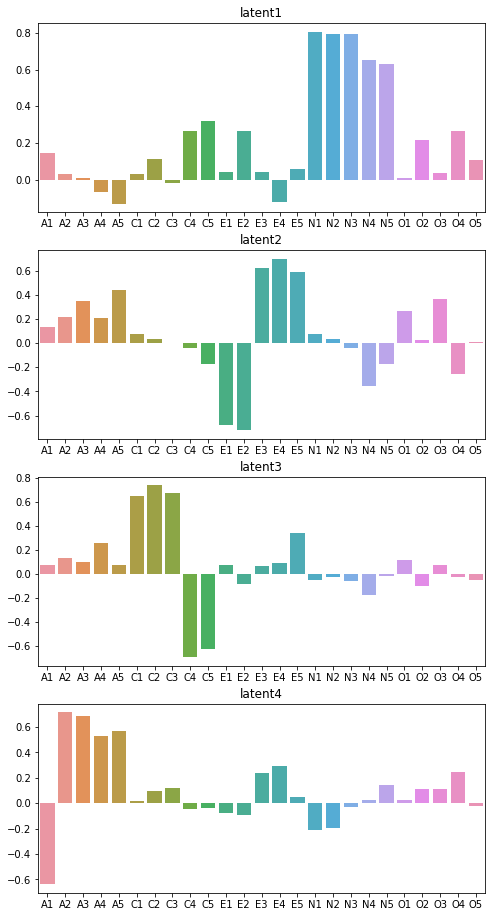

In [68]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 16))
for i, ax in enumerate(axes):
    ax.set_title(factors.index[i])
    sns.barplot(x=factors.iloc[i].index, y=factors.iloc[i].values, ax=ax)

In [69]:
# SS Loadings
# Proportion Var
# Cumulative Var
fa.get_factor_variance()

(array([3.18456274, 3.10232227, 2.61920628, 2.37572043, 2.14756657]),
 array([0.12738251, 0.12409289, 0.10476825, 0.09502882, 0.08590266]),
 array([0.12738251, 0.2514754 , 0.35624365, 0.45127247, 0.53717513]))

In [70]:
# Comminality
fa.get_communalities()

array([0.46659091, 0.58185993, 0.6068891 , 0.42340774, 0.54160167,
       0.48300612, 0.57921043, 0.47741341, 0.56589548, 0.53163698,
       0.47794582, 0.60739571, 0.53166887, 0.6101283 , 0.50657301,
       0.71024093, 0.67033952, 0.63598656, 0.58671197, 0.48156289,
       0.44388343, 0.43660194, 0.56056177, 0.44018605, 0.47207976])

In [71]:
from sklearn.decomposition import FactorAnalysis

In [72]:
### FA with Scikit-learn
fa = FactorAnalysis(n_components=5)
fa.fit(bfi)

FactorAnalysis(n_components=5)

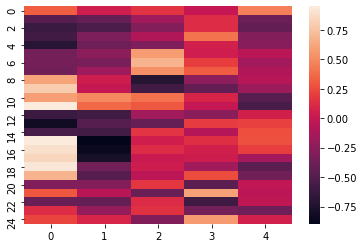

In [73]:
### 요인 적재 행렬 
sns.heatmap(pd.DataFrame(fa.components_).T)
plt.show()

In [74]:
# The estimated noise variance for each feature
fa.noise_variance_ 

array([1.63948936, 0.79959992, 0.80401417, 1.5220757 , 0.82419538,
       1.00515335, 0.9897638 , 1.12694924, 0.96456765, 1.49181394,
       1.67908697, 1.18046475, 1.01763303, 1.00548583, 1.067968  ,
       0.68998572, 0.79163628, 1.20884314, 1.2495894 , 1.7524464 ,
       0.85538357, 1.79549585, 0.75626997, 1.07088509, 1.26833739])

In [75]:
# Factor score
bfi_trans_df = pd.DataFrame(fa.transform(bfi))
bfi_trans_df.head()

,0,1,2,3,4
0,0.699751,0.975699,-1.287079,0.739315,0.931474
1,0.056338,-0.071712,-0.728433,-0.103563,0.429821
2,0.479061,-0.442499,0.261150,-0.259592,0.739260
3,0.386925,0.462680,-1.242410,0.477105,0.057517
4,-0.005560,0.472119,-0.203096,0.418761,0.907245


## Manifolds

### (1) LLE
- Locally Linear Embedding
- 비선형 차원 축소
- 각 train sample이 가장 가까운 이웃과 얼마나 선형적으로 연관되는지 측정
- 큰 데이터에는 적용 어려움

In [76]:
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [77]:
from sklearn.manifold import LocallyLinearEmbedding

In [78]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
x_reduced = lle.fit_transform(x)

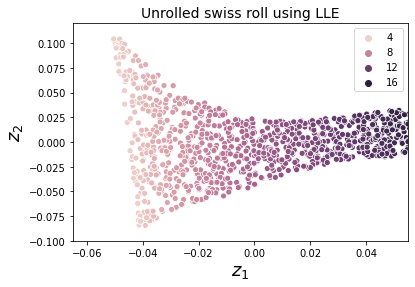

In [79]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.show()

### (2) Isomap
- 각 sample을 가장 가까운 이웃과 연결
- sample들의 geodesic distance (두 노드의 최단거리 노드 개수) 유지하면서 차원 축소

In [80]:
from sklearn.manifold import Isomap

In [81]:
isomap = Isomap(n_components=2)
x_reduced_isomap = isomap.fit_transform(x)

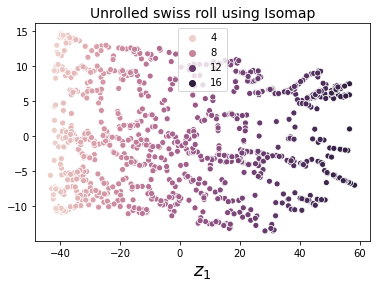

In [82]:
plt.title("Unrolled swiss roll using Isomap", fontsize=14)
sns.scatterplot(x=x_reduced_isomap[:, 0], y=x_reduced_isomap[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.show()

### (3) t-SNE
- t-distributed Stochastic Neighbor Embedding
- 비슷한 sample은 가까이, 비슷하지 않은 sample은 멀리 
- 쿨백-라이블러 발산 (KLD) 최소화
- 주로 2D 시각화에 사용

In [83]:
from sklearn.manifold import TSNE

In [84]:
tsne = TSNE(n_components=2, random_state=42)
x_reduced_tsne = tsne.fit_transform(x)

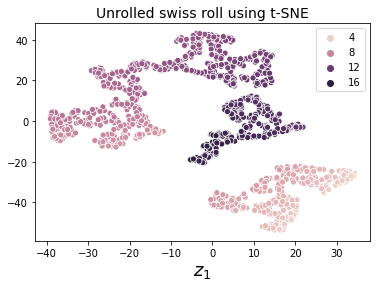

In [85]:
plt.title("Unrolled swiss roll using t-SNE", fontsize=14)
sns.scatterplot(x=x_reduced_tsne[:, 0], y=x_reduced_tsne[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.show()

### (4) MDS
- Multidimensional Scaling
- 여러 대상 간의 거리가 주어져 있고, 동일한 상대적 거리를 가진 실수공간의 점들로 배치시키는 방법
- 고차원 공간의 거리를 저차원 데이터에 표현
- 데이터 포인트의 유사성을 학습하여 자료들의 상대적 관계 이해
- 차원 수 선정
    - Kruskal의 stress value
    - 0~1 사이의 값을 가지며, 0에 가까울수록 적합도가 높음
    - 일반적으로, 0.1 이하일 경우 적절하다고 판단함
- Metric MDS와 Nonmetric MDS
    - 데이터가 수치형일 경우 계량적 MDS: 개체 간 거리행렬을 계산하여 공간에 표현 (metric=True)
    - 범주형 서열 척도인 경우 비계량적 MDS: 거리가 순서로 주어졌을 때, 서열 척도를 거리 속성과 같도록 변환 (metric=False)

In [86]:
from sklearn.manifold import MDS

In [87]:
mds = MDS(n_components=2, random_state=42)
x_reduced_mds = mds.fit_transform(x)

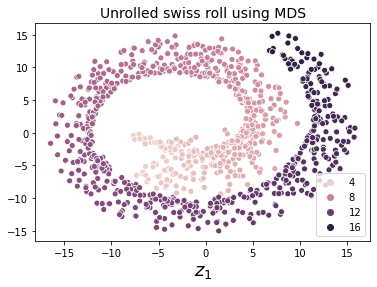

In [88]:
plt.title("Unrolled swiss roll using MDS", fontsize=14)
sns.scatterplot(x=x_reduced_mds[:, 0], y=x_reduced_mds[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.show()

In [89]:
### eurodist data
eurodist = pd.read_csv('./r_csv/datasets/eurodist.csv', index_col='city')
eurodist.head()

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
city,,,,,,,,,,,,,,,,,,,,,
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588


In [90]:
mds = MDS()
eurodist_transform = mds.fit_transform(eurodist)
eurodist_transform_df = pd.DataFrame(eurodist_transform)
eurodist_transform_df.index = eurodist.index
eurodist_transform_df.columns = ['x', 'y']

In [91]:
eurodist_transform_df.head()

,x,y
city,,
Athens,2419.137915,-8188.297901
Barcelona,-2815.923630,179.215347
Brussels,796.159358,2560.961353
Calais,497.545336,2471.714961
Cherbourg,-429.253028,2118.545884


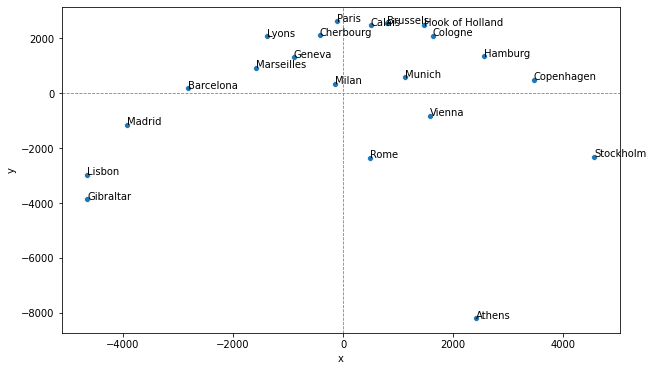

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=eurodist_transform_df['x'], y=eurodist_transform_df['y'])

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)

for language in eurodist_transform_df.index:
    plt.annotate(language, (eurodist_transform_df.loc[language, 'x'], eurodist_transform_df.loc[language, 'y']))
    
plt.show()

In [93]:
### wine data -> 최적의 차원 찾기
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [94]:
from sklearn.metrics import pairwise_distances

In [95]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(wine.drop('Class', axis=1))
distances = pairwise_distances(x_scaled)

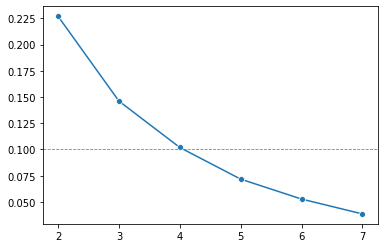

In [96]:
### Kruskal's stress: 0.1 이하일 때 적절
st_list = list()
for i in range(2, 8):
    mds = MDS(n_components=i, metric=True)
    mds.fit(x_scaled)
    
    st_list.append(np.sqrt(mds.stress_ / (0.5 * np.sum(distances**2))))

sns.lineplot(pd.Series(st_list).index +2, pd.Series(st_list).values, marker='o')
plt.axhline(0.1, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [97]:
mds = MDS(n_components=5, metric=True)
reduced_data = pd.DataFrame(np.c_[mds.fit_transform(x_scaled), wine['Class']], columns=['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'class'])
reduced_data

,dim1,dim2,dim3,dim4,dim5,class
0,0.98876,3.58891,-0.56513,0.863507,-1.10745,class_0
1,2.19394,1.05203,0.245437,0.178736,-2.29478,class_0
2,0.285524,2.56089,-1.67615,-1.22227,0.348002,class_0
3,0.469123,3.8103,-2.66574,0.0591546,-1.44536,class_0
4,-1.23824,2.08389,-0.0580012,-0.110519,0.995808,class_0
...,...,...,...,...,...,...
173,-1.71568,-2.59343,-2.50865,1.82504,0.996884,class_2
174,-2.04596,-1.5177,-1.20968,1.48043,0.567306,class_2
175,-1.77174,-1.60301,-1.92111,3.03018,-0.640765,class_2
176,-2.58293,-1.32073,-0.807544,1.98352,-1.40991,class_2


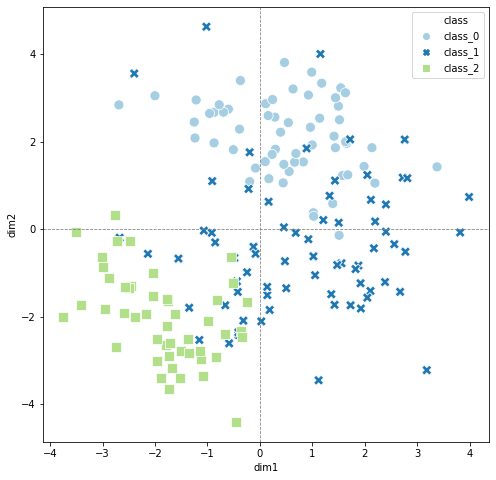

In [98]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='dim1', y='dim2', data=reduced_data, style='class', hue='class', palette='Paired', s=100)
plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [99]:
np.sqrt(mds.stress_ / (0.5 * np.sum(distances**2)))

0.07166632432438816

### (5) CA
- Correspondence Analysis
- MDS의 범주형 버전
- 범주형 변수(수준)들 간의 연관성을 분석한 후, 그 결과를 시각적 해석이 용이하도록 그래프화
- 범주형 변수의 빈도를 나타내고 있는 빈도교차표의 행과 열(명목변수의 범주 값들)을 그래프상의 자극점 형태로 표시하는 방법
- 단순 상응분석은 2개의 변수, 다중 상응분석은 3개 이상의 변수 활용
- 카이제곱 검정과 같이 범주형 변수간의 상호연관성을 바탕으로 진행되므로, 범주형 변수가 서로 연관성을 가지고 있다는 전제가 필요함

#### Simple CA

In [100]:
# !pip install prince
import prince

In [101]:
x = pd.DataFrame(data=[[326, 38, 241, 110, 3], [688, 116, 584, 188, 4], [343, 84, 909, 412, 26], [98, 48, 403, 681, 85]],
                 columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']), index=pd.Series(['Blue', 'Light', 'Medium', 'Dark']))

x.columns.rename('Hair color', inplace=True)
x.index.rename('Eye color', inplace=True)
x.head()

Hair color,Fair,Red,Medium,Dark,Black
Eye color,,,,,
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


In [102]:
ca = prince.CA()
ca.fit(x)

CA()

In [103]:
### row coordinates
coords_r = ca.row_coordinates(x)
coords_r.columns = ['x', 'y']
coords_r

,x,y
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


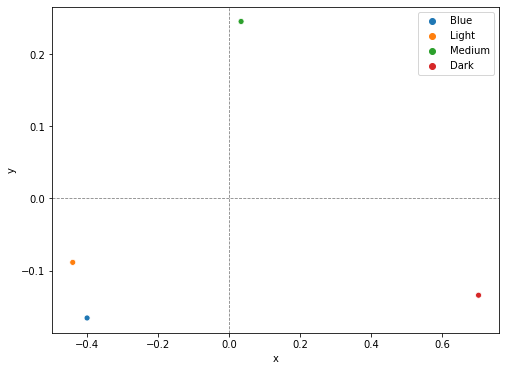

In [104]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_r, hue=coords_r.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [105]:
### column coordinates
coords_c = ca.column_coordinates(x)
coords_c.columns = ['x', 'y']
coords_c

,x,y
Fair,-0.543995,-0.173844
Red,-0.233261,-0.048279
Medium,-0.042024,0.208304
Dark,0.588709,-0.103950
Black,1.094388,-0.286437


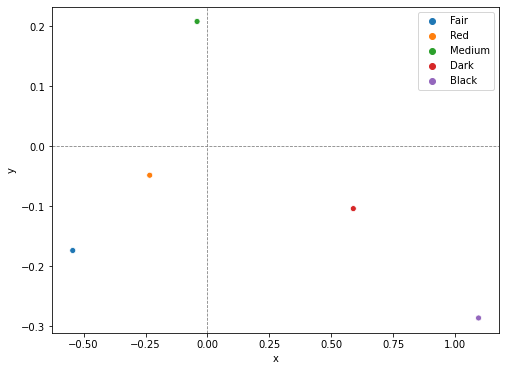

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_c, hue=coords_c.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

#### Multiple CA

In [107]:
stretch = pd.read_csv('./dataset/adult_stretch.csv')
stretch.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
stretch.head()

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


In [108]:
mca = prince.MCA()
mca.fit_transform(stretch)

,0,1
0,0.705387,-7.245488e-15
1,-0.386586,-5.102898e-15
2,-0.386586,-7.451231e-15
3,-0.852014,-5.737260e-15
4,0.783539,6.333333e-01
5,0.783539,6.333333e-01
6,-0.308434,6.333333e-01
7,-0.308434,6.333333e-01
8,-0.773862,6.333333e-01
9,0.783539,-6.333333e-01


In [109]:
### 차원 좌표
coords = mca.column_coordinates(stretch)
coords.columns = ['x', 'y']
coords

,x,y
Color_PURPLE,0.117308,-6.892024e-01
Color_YELLOW,-0.130342,7.657805e-01
Size_LARGE,0.117308,6.892024e-01
Size_SMALL,-0.130342,-7.657805e-01
Action_DIP,-0.853864,-9.289423e-16
Action_STRETCH,0.620992,6.552279e-16
Age_ADULT,0.620992,-1.446210e-15
Age_CHILD,-0.853864,2.007873e-15
Inflated_F,-0.731466,2.704302e-16
Inflated_T,1.253942,-5.221590e-16


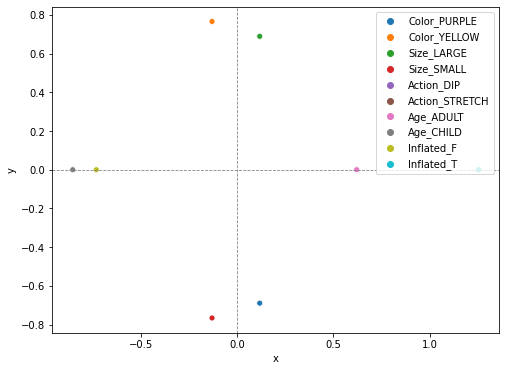

In [110]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords, hue=coords.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [111]:
mca.eigenvalues_

[0.4016565656013391, 0.21111111111111122]

In [112]:
mca.total_inertia_

1.0

## Reliability Analysis
- 여러 번 측정헸을 때 동일한 결과가 나오는 정도

### (1) Cronbach alpha
- Internal consistency (내적 일관성 분석)
- 요인분석과 동시에 진행하는 경우가 많음
- 주로 조사 데이터에 활용하며, 신뢰성을 평가하여 신뢰성이 낮은 컬럼 제외
- 하나의 개념을 측정하기 위해 여러 개의 하위 측정항목들이 존재할 경우 이들 측정 값 사이의 상관관계를 분석하여 신뢰성을 평가하는 방법
- 계수 >= 0.6 신뢰성이 존재, 계수 >= 0.7신뢰성이 높음)
- 계수가 낮을 경우에는 측정 항목들 간의 내적일관성이 떨어지는 것을 의미하므로 다른 측정 항목들과 상관관계가 낮은 측정항목을 제거하여 내적일관성을 향상시킬 수 있음
- 하나의 개념에 대해 신뢰성과 타당성을 평가하기 위한 최소의 항목 수는 3개이므로 가급적 모든 개념의 측정 항목 수는 3개 이상으로 유지하는 것이 중요

In [113]:
# enter survey responses as a DataFrame
df = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                   'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                   'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})
df.head()

,Q1,Q2,Q3
0,1,1,1
1,2,1,1
2,2,1,2
3,3,2,1
4,2,3,2


In [114]:
import pingouin as pg

In [115]:
pg.cronbach_alpha(data=df)

(0.7734375, array([0.336, 0.939]))

### (2) Intraclass Correlation Coefficient
- 재현성을 평가하는 지표
- 전체 변동 (개인 간 변동 + 개인 내 변동)중, 개인 간 변동의 비율 추정
    - 개인 내 변동은 원하지 않는 변동으로, 측정 오차에 해당함
- 0.4 미만 좋지 않음, 0.6이상 좋음, 0.75이상 매우 좋음 등으로 평가

In [116]:
wind_judge_score = pd.read_csv('./dataset/wine_judge_score.csv')

In [117]:
icc = pg.intraclass_corr(data=wind_judge_score, targets='Wine', raters='Judge', ratings='Scores').round(3)
icc.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.728,11.680,7,24,0.0,"[0.43, 0.93]"
ICC2,Single random raters,0.728,11.787,7,21,0.0,"[0.43, 0.93]"
ICC3,Single fixed raters,0.729,11.787,7,21,0.0,"[0.43, 0.93]"
ICC1k,Average raters absolute,0.914,11.680,7,24,0.0,"[0.75, 0.98]"
ICC2k,Average random raters,0.914,11.787,7,21,0.0,"[0.75, 0.98]"
ICC3k,Average fixed raters,0.915,11.787,7,21,0.0,"[0.75, 0.98]"


### (3) Bland-Altman Plot
- 동일 대상을 두 번 측정하고, 각 짝마다 평균과 차이를 구함
- 측정치의 차이는 정규분포를 따른다고 가정 (검정 필요)
- x: 두 관측치의 평균, y: 두 관측치의 차이값
- 차이 값이 Confidence limit을 넘지 않는 경우, 두 검사법(측정)은 일치한다고 판단함

In [118]:
df = pd.DataFrame({'A': [5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 10, 11, 13, 14, 14, 15, 18, 22, 25],
                   'B': [4, 4, 5, 5, 5, 7, 8, 6, 9, 7, 7, 11, 13, 13, 12, 13, 14, 19, 19, 24]})  
df.head()

,A,B
0,5,4
1,5,4
2,5,5
3,6,5
4,6,5


In [119]:
import statsmodels.api as sm

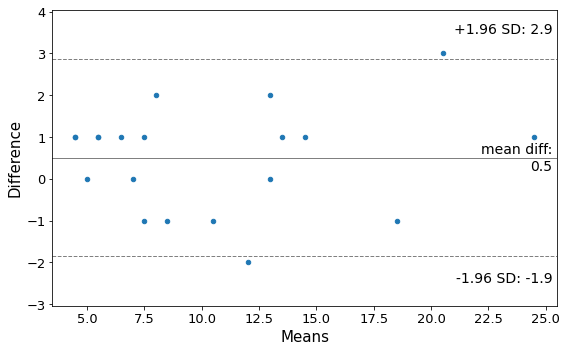

In [120]:
fig, ax = plt.subplots(1, figsize=(8, 5))
sm.graphics.mean_diff_plot(df.A, df.B, ax=ax)
plt.show()